## **Problem Statement: Automated Classification of Date Fruit Varieties**

### **Background**
Date fruits, grown globally, have various genetic varieties distinguished by their external appearance, including features like color, length, diameter, and shape. Traditionally, identifying these varieties requires expert knowledge, which is both time-consuming and labor-intensive. Automating this process using machine learning can significantly enhance efficiency and accuracy.

### **Objective**
The aim of this study is to develop an automated system for classifying different varieties of date fruits using image analysis and machine learning techniques. Specifically, the varieties to be classified include Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai.

### **Dataset Description**
The dataset consists of 898 images of seven different date fruit varieties, captured using a computer vision system (CVS). From these images, 34 features were extracted, encompassing morphological characteristics, shape, and color.

### **Impact**
Developing an automated classification system for date fruit varieties will streamline the identification process, reduce the need for expert intervention, and ensure consistent and accurate classification. This can significantly benefit agricultural practices, quality control, and market segmentation for date fruits.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier

In [7]:
# Load the dataset
data = pd.read_excel('Date_Fruit_Datasets.xlsx')

In [8]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [10]:
# Separate features and target
x = data.drop(['Class'], axis=1)
y = data['Class']

In [11]:
x.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666


In [12]:
y.unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [14]:
y.tail()

893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, dtype: object

In [22]:
#encoding the categorical features
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [23]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
#scaling the numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
#NB: Dont scale the y_data

In [35]:
# Step 2: Build the initial MLPClassifier model
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp.fit(x_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [36]:
# Make predictions
y_train_pred = mlp.predict(x_train)
y_test_pred = mlp.predict(x_test)

In [38]:
# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test =accuracy_score(y_test, y_test_pred)


print(f"Initial MLP Classifier Train Accuracy Score: {accuracy_train}")
print(f"Initial MLP classifier Test Accuracy: {accuracy_test}")

Initial MLP Classifier Train Accuracy Score: 0.9986072423398329
Initial MLP classifier Test Accuracy: 0.95


In [39]:
# Use RandomizedSearchCV to find the best hyperparameters
param_dist = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001,0.001,0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}

random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=20, cv=3, random_state=42)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=MLPClassifier(max_iter=1000, random_state=42),
                   n_iter=20,
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'logistic'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   random_state=42)

In [40]:
# Best parameters
print(f"Best parameters found: {random_search.best_params_}")

# Evaluate the optimized model
optimized_mlp = random_search.best_estimator_
y_train_pred_optimized = optimized_mlp.predict(x_train)
y_test_pred_optimized = optimized_mlp.predict(x_test)
accuracy_train_optimized = mean_squared_error(y_train, y_train_pred_optimized)
accuracy_test_optimized = mean_squared_error(y_test, y_test_pred_optimized)


print(f"Optimized MLP Classifier Train Accuracy Score: {accuracy_train}")
print(f"Optimized MLP classifier Test Accuracy: {accuracy_test}")

Best parameters found: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.001, 'activation': 'tanh'}
Optimized MLP Classifier Train Accuracy Score: 0.9986072423398329
Optimized MLP classifier Test Accuracy: 0.95


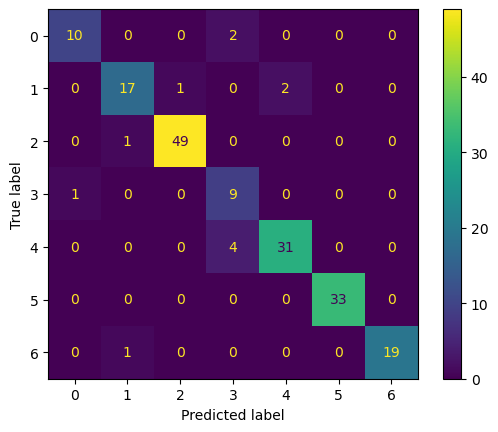

In [41]:
y_pred_classes = random_search.predict(x_test)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()